<a href="https://colab.research.google.com/github/eugeqq/Protocolos/blob/main/MyS_C9A_Modelos_Estadisticos_Especiales__R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Estadísticos Especiales - Ejemplos Prácticos
### UCA - Ingeniería Informática - Modelos y Simulación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1) Distribución Normal - Limitaciones

Resumen teórico:
- Distribución simétrica con forma de campana
- Parámetros: $μ$ (media), $σ$ (desvío estándar)
- Función de densidad: f(x) = (1/(σ√(2π))) * e^(-(x-μ)²/(2σ²))
- Se extiende de $-∞$ a $+∞$

Limitaciones:
- Puede tomar valores negativos (problemático para tiempos, distancias, etc.)
- Es perfectamente simétrica (no representa fenómenos asimétricos)
- Subestima eventos extremos (colas ligeras)

In [ ]:
# Ejemplo: Tiempo de vida de componentes
print("\nEJEMPLO: Tiempo de vida de componentes electrónicos")
print("Comparación entre Normal y la realidad (asimétrica)")


EJEMPLO: Tiempo de vida de componentes electrónicos
Comparación entre Normal y la realidad (asimétrica)


In [ ]:
# Datos simulados de tiempos de vida (asimétricamente distribuidos)
np.random.seed(42)
tiempos_reales = np.random.gamma(2, 50, 1000)  # Distribución asimétrica

In [ ]:
# Intentar ajustar con Normal
mu_normal = np.mean(tiempos_reales)
sigma_normal = np.std(tiempos_reales)

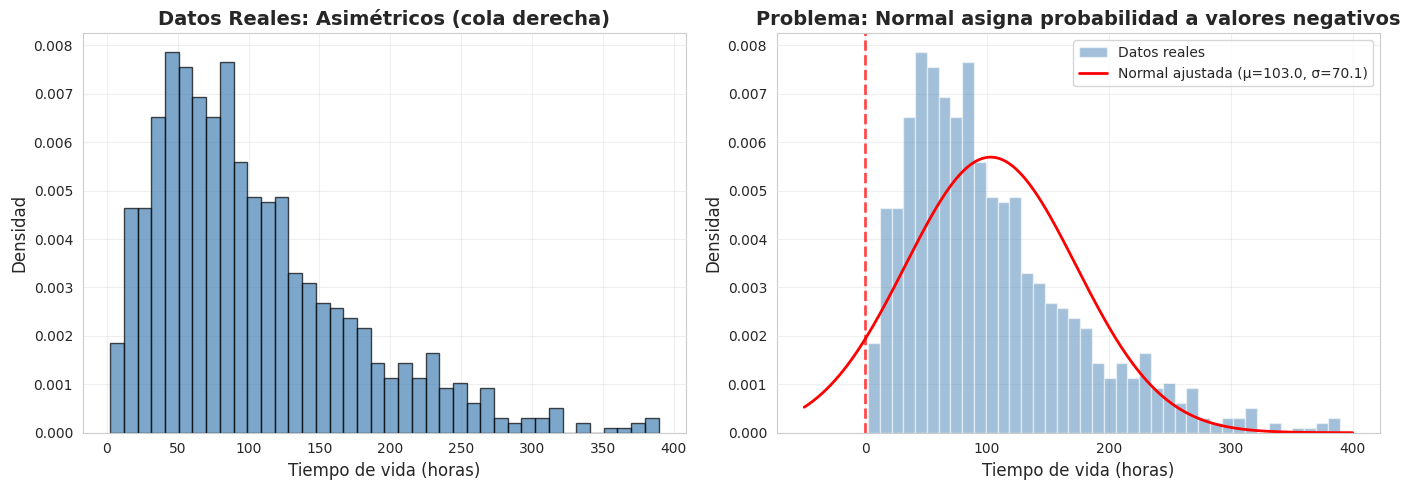

In [ ]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de datos reales
axes[0].hist(tiempos_reales, bins=40, density=True, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Tiempo de vida (horas)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].set_title('Datos Reales: Asimétricos (cola derecha)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Comparación: Normal vs Realidad
x = np.linspace(-50, 400, 1000)
axes[1].hist(tiempos_reales, bins=40, density=True, alpha=0.5, color='steelblue', label='Datos reales')
axes[1].plot(x, stats.norm.pdf(x, mu_normal, sigma_normal), 'r-', lw=2,
             label=f'Normal ajustada (μ={mu_normal:.1f}, σ={sigma_normal:.1f})')
axes[1].set_xlabel('Tiempo de vida (horas)', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].set_title('Problema: Normal asigna probabilidad a valores negativos', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].axvline(x=0, color='red', linestyle='--', lw=2, alpha=0.7, label='x=0 (imposible)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n⚠️ PROBLEMA: La distribución Normal asigna P(X<0) = {stats.norm.cdf(0, mu_normal, sigma_normal):.4f}")
print("   Esto es imposible para tiempos de vida")


⚠️ PROBLEMA: La distribución Normal asigna P(X<0) = 0.0709
   Esto es imposible para tiempos de vida


# 2) Distribución de Gumbel - Valores extremos

Resumen teórico:
- Modela valores extremos (máximos y mínimos)
- Parámetros: $μ$ (ubicación), $β$ (escala)
- Función de densidad: f(x) = (1/β) * e^(-(x-μ)/β) * e^(-e^(-(x-μ)/β))
- Aplicación: máximas precipitaciones, crecidas, terremotos, vientos

Ventajas sobre la Normal:
- Asigna mayor probabilidad a valores extremos (colas pesadas)

In [ ]:
print("\nEJEMPLO: Máxima precipitación anual en una ciudad")
print("Queremos predecir la precipitación máxima para diseñar un sistema de drenaje")


EJEMPLO: Máxima precipitación anual en una ciudad
Queremos predecir la precipitación máxima para diseñar un sistema de drenaje


In [ ]:
# Datos históricos de precipitaciones máximas anuales (mm)
np.random.seed(42)
precipitaciones = stats.gumbel_r.rvs(loc=100, scale=20, size=30)  # 30 años de datos

In [ ]:
# Ajustar distribución de Gumbel
mu_gumbel, beta_gumbel = stats.gumbel_r.fit(precipitaciones)

print(f"\nParámetros estimados: μ = {mu_gumbel:.2f} mm, β = {beta_gumbel:.2f} mm")


Parámetros estimados: μ = 96.42 mm, β = 16.96 mm


In [ ]:
# Calcular precipitación esperada cada 100 años (percentil 99)
precip_100_years = stats.gumbel_r.ppf(0.99, loc=mu_gumbel, scale=beta_gumbel)
print(f"Precipitación esperada cada 100 años: {precip_100_years:.2f} mm")

Precipitación esperada cada 100 años: 174.42 mm


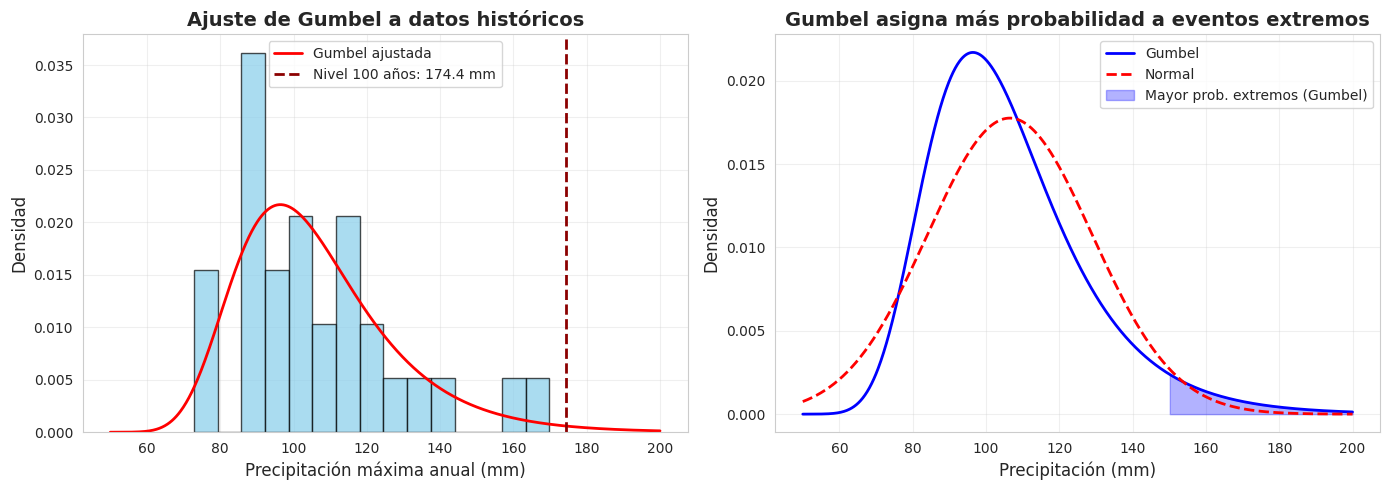

In [ ]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma con ajuste
x = np.linspace(50, 200, 1000)
axes[0].hist(precipitaciones, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].plot(x, stats.gumbel_r.pdf(x, loc=mu_gumbel, scale=beta_gumbel), 'r-', lw=2,
             label='Gumbel ajustada')
axes[0].axvline(precip_100_years, color='darkred', linestyle='--', lw=2,
                label=f'Nivel 100 años: {precip_100_years:.1f} mm')
axes[0].set_xlabel('Precipitación máxima anual (mm)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].set_title('Ajuste de Gumbel a datos históricos', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Comparación Gumbel vs Normal
mu_n = np.mean(precipitaciones)
sigma_n = np.std(precipitaciones)
axes[1].plot(x, stats.gumbel_r.pdf(x, loc=mu_gumbel, scale=beta_gumbel), 'b-', lw=2, label='Gumbel')
axes[1].plot(x, stats.norm.pdf(x, mu_n, sigma_n), 'r--', lw=2, label='Normal')
axes[1].fill_between(x[x>150], 0, stats.gumbel_r.pdf(x[x>150], loc=mu_gumbel, scale=beta_gumbel),
                      alpha=0.3, color='blue', label='Mayor prob. extremos (Gumbel)')
axes[1].set_xlabel('Precipitación (mm)', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].set_title('Gumbel asigna más probabilidad a eventos extremos', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3) Distribución de Pareto - Colas pesadas

Resumen teórico:
- Modela fenómenos con "colas pesadas" (valores extremos muy grandes)
- Parámetros: x_m (mínimo), $α$ (forma/cola)
- Función de densidad: f(x) = (α * x_m^α) / x^(α+1), para x ≥ x_m
- Media: E[X] = α*x_m / (α-1), si α > 1
- Principio de Pareto (80/20): el 20% de las causas produce el 80% de los efectos

Ventaja sobre la Normal:
- Describe mejor eventos raros pero de gran magnitud
- Aplicaciones: seguros, terremotos, siniestros

In [ ]:
print("\nEJEMPLO: Monto de siniestros en una aseguradora")
print("Los siniestros pequeños son frecuentes, pero algunos son extremadamente grandes")


EJEMPLO: Monto de siniestros en una aseguradora
Los siniestros pequeños son frecuentes, pero algunos son extremadamente grandes


In [ ]:
# Parámetros
x_m = 1000  # Monto mínimo de siniestro (USD)
alpha = 2.5

print(f"\nParámetros: x_m = ${x_m}, α = {alpha}")


Parámetros: x_m = $1000, α = 2.5


In [ ]:
# Calcular probabilidad de siniestro mayor a $5000
prob_mayor_5000 = (x_m / 5000) ** alpha
print(f"Probabilidad de siniestro > $5000: {prob_mayor_5000:.4f} ({prob_mayor_5000*100:.2f}%)")

Probabilidad de siniestro > $5000: 0.0179 (1.79%)


In [ ]:
# Calcular el percentil 95 (5% de siniestros más grandes)
percentil_95 = x_m / (0.05 ** (1/alpha))
print(f"El 5% de los siniestros más grandes superan: ${percentil_95:.2f}")

El 5% de los siniestros más grandes superan: $3314.45


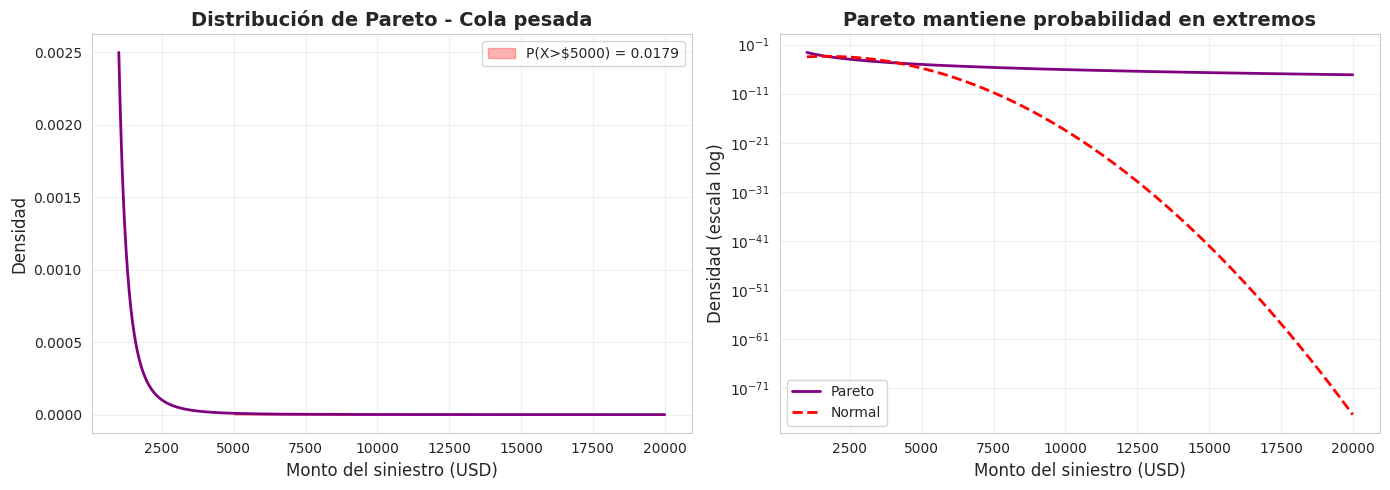

In [ ]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF y CDF
x = np.linspace(x_m, 20000, 1000)
pdf_pareto = stats.pareto.pdf(x, alpha, scale=x_m)
cdf_pareto = stats.pareto.cdf(x, alpha, scale=x_m)

axes[0].plot(x, pdf_pareto, 'purple', lw=2)
axes[0].fill_between(x[x>5000], 0, pdf_pareto[x>5000], alpha=0.3, color='red',
                      label=f'P(X>$5000) = {prob_mayor_5000:.4f}')
axes[0].set_xlabel('Monto del siniestro (USD)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].set_title('Distribución de Pareto - Cola pesada', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Comparación Pareto vs Normal (en escala log)
mu_equiv = x_m * alpha / (alpha - 1)
sigma_equiv = 1000
axes[1].plot(x, pdf_pareto, 'purple', lw=2, label='Pareto')
axes[1].plot(x, stats.norm.pdf(x, mu_equiv, sigma_equiv), 'r--', lw=2, label='Normal')
axes[1].set_xlabel('Monto del siniestro (USD)', fontsize=12)
axes[1].set_ylabel('Densidad (escala log)', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_title('Pareto mantiene probabilidad en extremos', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\n💡 Principio 80/20: Pocos siniestros (20%) representan la mayor parte del costo (80%)")


💡 Principio 80/20: Pocos siniestros (20%) representan la mayor parte del costo (80%)


# 4) Distribución de Poisson - Eventos Discretos

Resumen teórico:
- Modela el número de eventos discretos en un intervalo de tiempo/espacio
- Parámetro: $λ$ (tasa promedio de ocurrencia)
- Función de probabilidad: P(X=k) = (λ^k * e^(-λ)) / k!
- Propiedades: E[X] = Var[X] = λ

Aplicaciones:
- Número de fallas por hora
- Llegadas de clientes a un servidor
- Defectos por metro de cable

In [ ]:
print("\nEJEMPLO: Fallas en una planta industrial")
print("Una planta reporta en promedio λ = 3 fallas por día")


EJEMPLO: Fallas en una planta industrial
Una planta reporta en promedio λ = 3 fallas por día


In [ ]:
# Parámetro
lambda_fallas = 3

print(f"\nTasa promedio: λ = {lambda_fallas} fallas/día")

# Calcular probabilidades
print("\nProbabilidades:")
for k in [0, 1, 2, 3, 5, 8]:
    prob = stats.poisson.pmf(k, lambda_fallas)
    print(f"  P(X = {k} fallas) = {prob:.4f} ({prob*100:.2f}%)")


Tasa promedio: λ = 3 fallas/día

Probabilidades:
  P(X = 0 fallas) = 0.0498 (4.98%)
  P(X = 1 fallas) = 0.1494 (14.94%)
  P(X = 2 fallas) = 0.2240 (22.40%)
  P(X = 3 fallas) = 0.2240 (22.40%)
  P(X = 5 fallas) = 0.1008 (10.08%)
  P(X = 8 fallas) = 0.0081 (0.81%)


In [ ]:
# Probabilidad de más de 5 fallas
prob_mas_5 = 1 - stats.poisson.cdf(5, lambda_fallas)
print(f"\n  P(X > 5 fallas) = {prob_mas_5:.4f} ({prob_mas_5*100:.2f}%)")


  P(X > 5 fallas) = 0.0839 (8.39%)


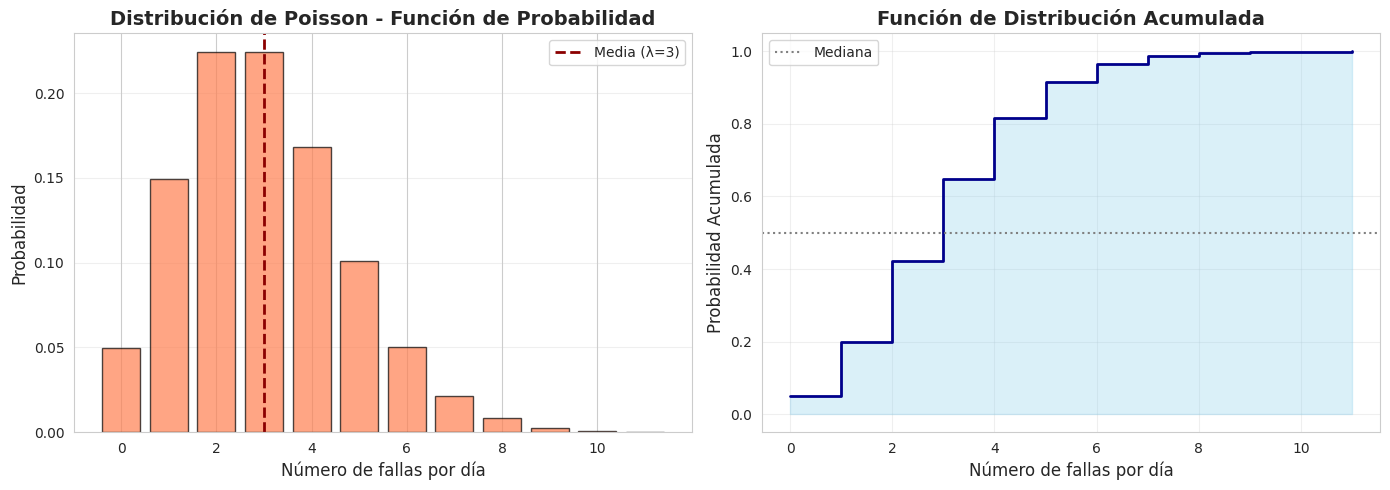

In [ ]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF
k_values = np.arange(0, 12)
pmf_values = stats.poisson.pmf(k_values, lambda_fallas)

axes[0].bar(k_values, pmf_values, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(lambda_fallas, color='darkred', linestyle='--', lw=2, label=f'Media (λ={lambda_fallas})')
axes[0].set_xlabel('Número de fallas por día', fontsize=12)
axes[0].set_ylabel('Probabilidad', fontsize=12)
axes[0].set_title('Distribución de Poisson - Función de Probabilidad', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# CDF
cdf_values = stats.poisson.cdf(k_values, lambda_fallas)
axes[1].step(k_values, cdf_values, where='post', color='darkblue', lw=2)
axes[1].fill_between(k_values, 0, cdf_values, step='post', alpha=0.3, color='skyblue')
axes[1].axhline(0.5, color='gray', linestyle=':', lw=1.5, label='Mediana')
axes[1].set_xlabel('Número de fallas por día', fontsize=12)
axes[1].set_ylabel('Probabilidad Acumulada', fontsize=12)
axes[1].set_title('Función de Distribución Acumulada', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5) Distribución Gamma - Relación con Exponencial y Erlang

Resumen teórico:
- Modela tiempos hasta la ocurrencia de k eventos
- Parámetros: k (forma), $θ$ (escala)
- Función de densidad: f(x) = (x^(k-1) * e^(-x/θ)) / (θ^k * Γ(k))
- Media: E[X] = k*θ
- Varianza: Var[X] = k*θ²

Casos especiales:
- k=1 -> Distribución Exponencial (tiempo hasta el 1er evento)
- k entero -> Distribución Erlang (tiempo hasta el k-ésimo evento)

Aplicaciones:
- Tiempos entre fallas acumulados
- Procesos de espera (tiempo hasta el 3er cliente, 5ta falla, etc.)

In [ ]:
print("\nEJEMPLO: Tiempo hasta la 3ra falla en un sistema")
print("Las fallas ocurren con tasa λ = 0.1 fallas/hora")


EJEMPLO: Tiempo hasta la 3ra falla en un sistema
Las fallas ocurren con tasa λ = 0.1 fallas/hora


In [ ]:
# Parámetros
k = 3  # Esperamos 3 fallas
theta = 10  # θ = 1/λ = 1/0.1 = 10 horas

print(f"\nParámetros: k = {k} eventos, θ = {theta} horas")
print(f"Tiempo promedio hasta 3ra falla: {k*theta} horas")


Parámetros: k = 3 eventos, θ = 10 horas
Tiempo promedio hasta 3ra falla: 30 horas


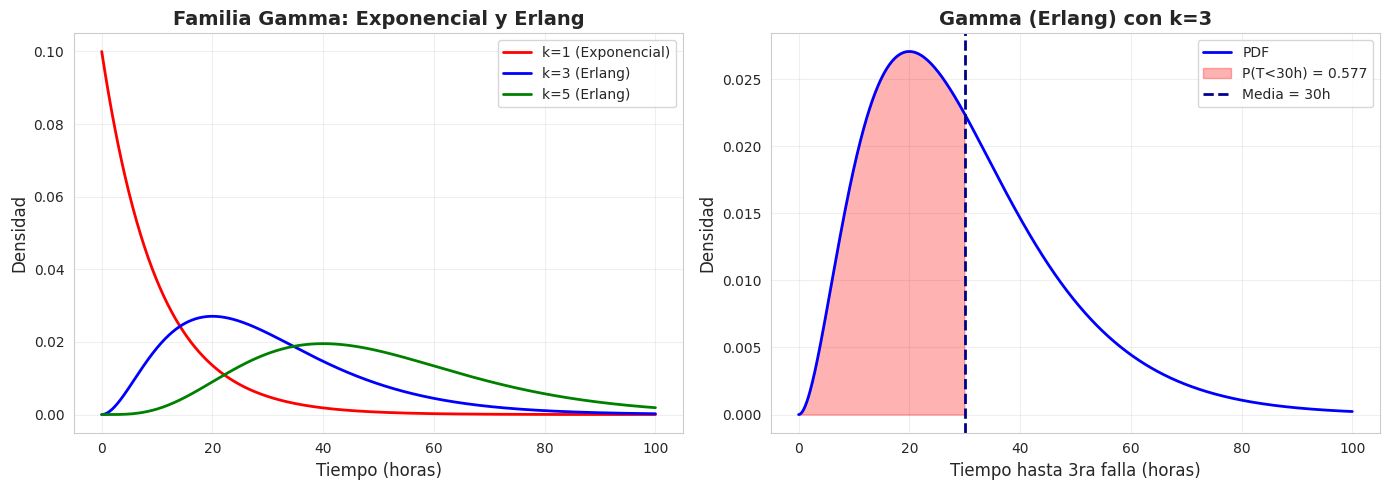


P(Tiempo hasta 3ra falla < 30 horas) = 0.5768


In [ ]:
# Gráfico comparando Exponencial (k=1), Erlang (k=3) y Gamma general (k=2.5)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 100, 1000)

# Comparación de diferentes k
axes[0].plot(x, stats.gamma.pdf(x, a=1, scale=theta), 'r-', lw=2, label='k=1 (Exponencial)')
axes[0].plot(x, stats.gamma.pdf(x, a=3, scale=theta), 'b-', lw=2, label='k=3 (Erlang)')
axes[0].plot(x, stats.gamma.pdf(x, a=5, scale=theta), 'g-', lw=2, label='k=5 (Erlang)')
axes[0].set_xlabel('Tiempo (horas)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].set_title('Familia Gamma: Exponencial y Erlang', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Probabilidades para k=3
pdf_k3 = stats.gamma.pdf(x, a=k, scale=theta)
cdf_k3 = stats.gamma.cdf(x, a=k, scale=theta)

axes[1].plot(x, pdf_k3, 'b-', lw=2, label='PDF')
axes[1].fill_between(x[x<30], 0, pdf_k3[x<30], alpha=0.3, color='red',
                      label=f'P(T<30h) = {stats.gamma.cdf(30, a=k, scale=theta):.3f}')
axes[1].axvline(k*theta, color='darkblue', linestyle='--', lw=2, label=f'Media = {k*theta}h')
axes[1].set_xlabel('Tiempo hasta 3ra falla (horas)', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].set_title('Gamma (Erlang) con k=3', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

prob_antes_30 = stats.gamma.cdf(30, a=k, scale=theta)
print(f"\nP(Tiempo hasta 3ra falla < 30 horas) = {prob_antes_30:.4f}")

# 6) Distribución Weibull - Análisis de confiabilidad

Resumen teórico:
- Distribución clave en ingeniería de confiabilidad
- Parámetros: k (forma), $λ$ (escala)
- Función de densidad: f(x) = (k/λ) * (x/λ)^(k-1) * e^(-(x/λ)^k)
- Confiabilidad: R(t) = e^(-(t/λ)^k)
- Tasa de falla: h(t) = (k/λ) * (t/λ)^(k-1)

Interpretación del parámetro k:
- k<1 -> mortalidad infantil (alta tasa de fallas iniciales)
- k=1 -> tasa contante (equivale a la exponencial)
- k>1 -> fallas por desgaste (aumenta con el tiempo)

Aplicaciones:
- Duración de motores, bombas, cables
- Life Data Analysis
- Predicción de mantenimiento

In [ ]:
print("\nEJEMPLO: Vida útil de motores eléctricos")
print("Un motor tiene vida útil Weibull con k=2.5 (desgaste), λ=1000 horas")


EJEMPLO: Vida útil de motores eléctricos
Un motor tiene vida útil Weibull con k=2.5 (desgaste), λ=1000 horas


In [ ]:
# Parámetros
k_weibull = 2.5
lambda_weibull = 1000

print(f"\nParámetros: k = {k_weibull}, λ = {lambda_weibull} horas")


Parámetros: k = 2.5, λ = 1000 horas


In [ ]:
# Calcular probabilidad de falla antes de 800 h
prob_falla_800 = stats.weibull_min.cdf(800, k_weibull, scale=lambda_weibull)
print(f"\nP(Falla antes de 800 horas) = {prob_falla_800:.4f} ({prob_falla_800*100:.1f}%)")

# Confiabilidad (probabilidad de sobrevivir)
confiabilidad_800 = 1 - prob_falla_800
print(f"Confiabilidad a 800 horas: {confiabilidad_800:.4f} ({confiabilidad_800*100:.1f}%)")

# Tiempo medio de vida
tiempo_medio = lambda_weibull * math.gamma(1 + 1/k_weibull)
print(f"Tiempo medio de vida: {tiempo_medio:.1f} horas")


P(Falla antes de 800 horas) = 0.4358 (43.6%)
Confiabilidad a 800 horas: 0.5642 (56.4%)
Tiempo medio de vida: 887.3 horas


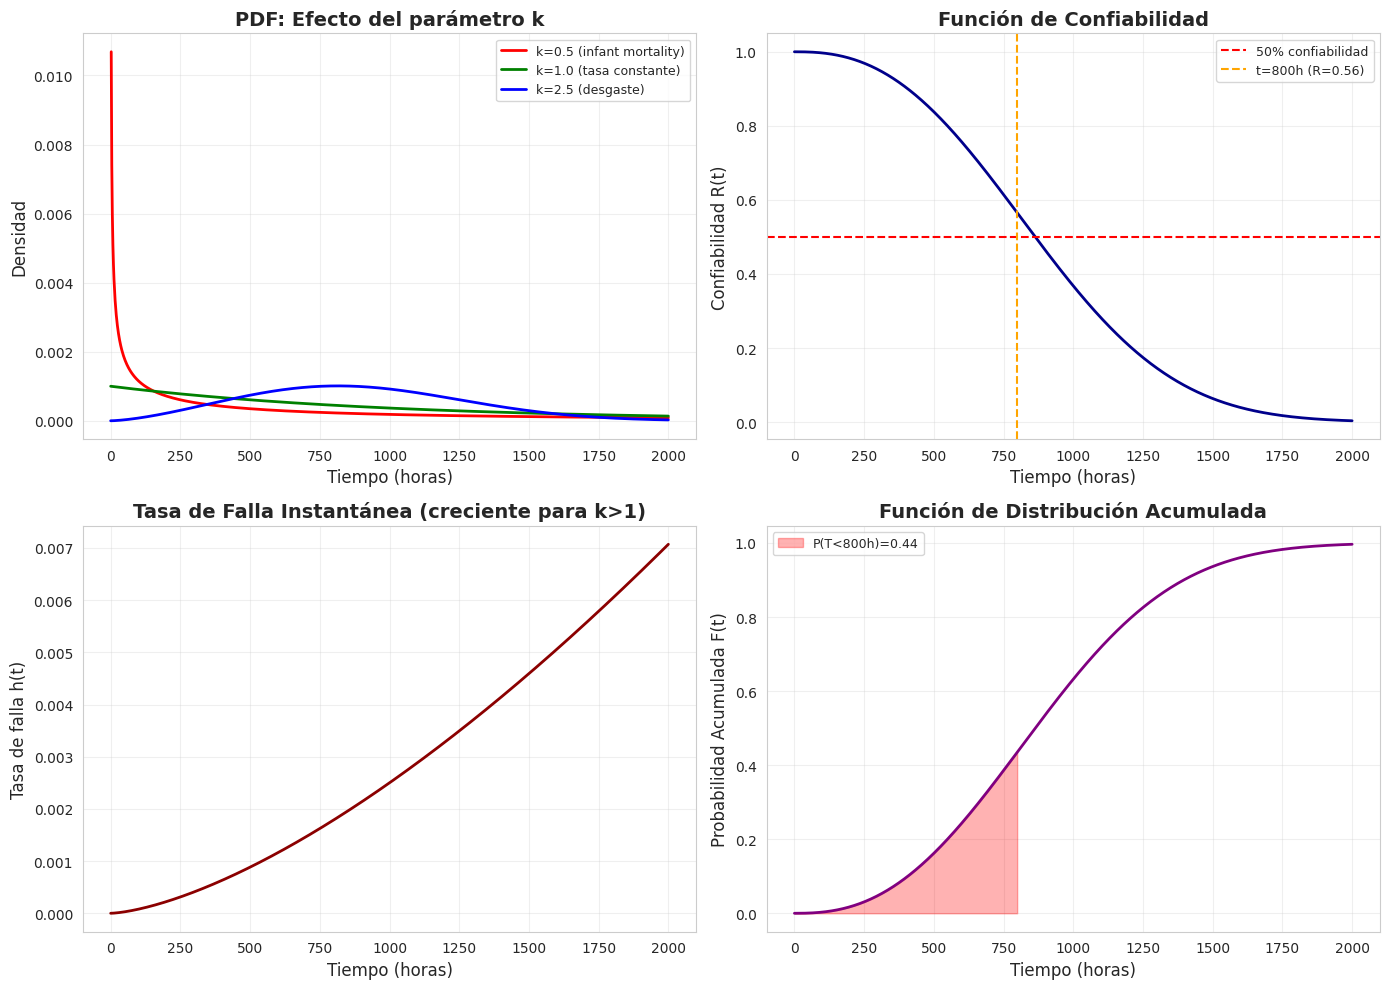

In [ ]:
# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

t = np.linspace(0, 2000, 1000)

# PDF para diferentes k
axes[0, 0].plot(t, stats.weibull_min.pdf(t, 0.5, scale=lambda_weibull), 'r-', lw=2, label='k=0.5 (infant mortality)')
axes[0, 0].plot(t, stats.weibull_min.pdf(t, 1.0, scale=lambda_weibull), 'g-', lw=2, label='k=1.0 (tasa constante)')
axes[0, 0].plot(t, stats.weibull_min.pdf(t, 2.5, scale=lambda_weibull), 'b-', lw=2, label='k=2.5 (desgaste)')
axes[0, 0].set_xlabel('Tiempo (horas)', fontsize=12)
axes[0, 0].set_ylabel('Densidad', fontsize=12)
axes[0, 0].set_title('PDF: Efecto del parámetro k', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Confiabilidad R(t)
confiabilidad = 1 - stats.weibull_min.cdf(t, k_weibull, scale=lambda_weibull)
axes[0, 1].plot(t, confiabilidad, 'darkblue', lw=2)
axes[0, 1].axhline(0.5, color='red', linestyle='--', lw=1.5, label='50% confiabilidad')
axes[0, 1].axvline(800, color='orange', linestyle='--', lw=1.5, label=f't=800h (R={confiabilidad_800:.2f})')
axes[0, 1].set_xlabel('Tiempo (horas)', fontsize=12)
axes[0, 1].set_ylabel('Confiabilidad R(t)', fontsize=12)
axes[0, 1].set_title('Función de Confiabilidad', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Tasa de falla h(t)
tasa_falla = (k_weibull/lambda_weibull) * (t/lambda_weibull)**(k_weibull-1)
axes[1, 0].plot(t, tasa_falla, 'darkred', lw=2)
axes[1, 0].set_xlabel('Tiempo (horas)', fontsize=12)
axes[1, 0].set_ylabel('Tasa de falla h(t)', fontsize=12)
axes[1, 0].set_title('Tasa de Falla Instantánea (creciente para k>1)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# CDF
cdf = stats.weibull_min.cdf(t, k_weibull, scale=lambda_weibull)
axes[1, 1].plot(t, cdf, 'purple', lw=2)
axes[1, 1].fill_between(t[t<800], 0, cdf[t<800], alpha=0.3, color='red',
                         label=f'P(T<800h)={prob_falla_800:.2f}')
axes[1, 1].set_xlabel('Tiempo (horas)', fontsize=12)
axes[1, 1].set_ylabel('Probabilidad Acumulada F(t)', fontsize=12)
axes[1, 1].set_title('Función de Distribución Acumulada', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7) Distribución Beta - Proporciones y probabilidades

Resumen teórico:
- Modela proporciones o probabilidades (valores entre 0 y 1)
- Parámetros: $α$ (forma 1), $β$ (forma 2)
- Función de densidad: f(x) = (x^(α-1) * (1-x)^(β-1)) / B(α,β)
- Dominio: 0 ≤ x ≤ 1
- Media: E[X] = α / (α + β)

Interpretación:
- α > β: Sesgo hacia valores altos (cerca de 1)
- α < β: Sesgo hacia valores bajos (cerca de 0)
- α = β: Simétrica

APLICACIONES:
- Rendimiento de procesos (eficiencia entre 0 y 1)
- Probabilidades bayesianas
- Control de calidad
- Simulación Monte Carlo

In [ ]:
print("\nEJEMPLO: Rendimiento de un proceso de manufactura")
print("Modelamos la proporción de productos defectuosos")


EJEMPLO: Rendimiento de un proceso de manufactura
Modelamos la proporción de productos defectuosos


In [ ]:

# Parámetros
alpha = 2
beta = 5

media_beta = alpha / (alpha + beta)

print(f"\nParámetros: α = {alpha}, β = {beta}")
print(f"Rendimiento promedio: {media_beta:.3f} ({media_beta*100:.1f}%)")
print(f"→ Sesgo hacia valores bajos (β > α): proceso con baja eficiencia")

# Calcular probabilidades
prob_menos_30 = stats.beta.cdf(0.3, alpha, beta)
prob_mas_50 = 1 - stats.beta.cdf(0.5, alpha, beta)

print(f"\nP(Rendimiento < 30%) = {prob_menos_30:.4f}")
print(f"P(Rendimiento > 50%) = {prob_mas_50:.4f}")


Parámetros: α = 2, β = 5
Rendimiento promedio: 0.286 (28.6%)
→ Sesgo hacia valores bajos (β > α): proceso con baja eficiencia

P(Rendimiento < 30%) = 0.5798
P(Rendimiento > 50%) = 0.1094


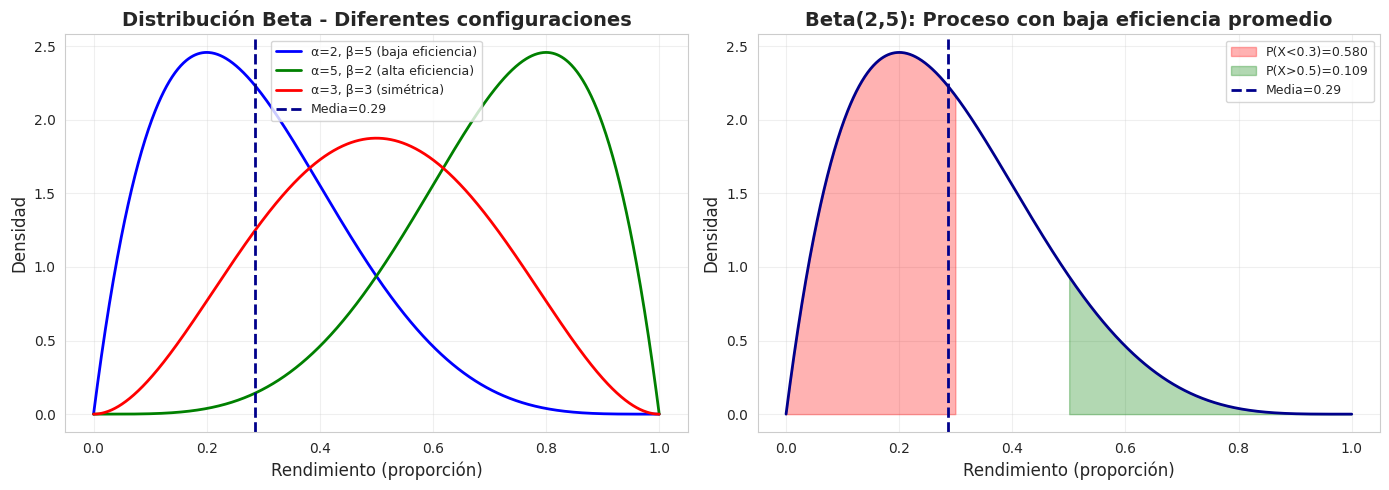

In [ ]:
# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 1, 1000)

# PDF con diferentes parámetros
axes[0].plot(x, stats.beta.pdf(x, 2, 5), 'b-', lw=2, label='α=2, β=5 (baja eficiencia)')
axes[0].plot(x, stats.beta.pdf(x, 5, 2), 'g-', lw=2, label='α=5, β=2 (alta eficiencia)')
axes[0].plot(x, stats.beta.pdf(x, 3, 3), 'r-', lw=2, label='α=3, β=3 (simétrica)')
axes[0].axvline(media_beta, color='darkblue', linestyle='--', lw=2, label=f'Media={media_beta:.2f}')
axes[0].set_xlabel('Rendimiento (proporción)', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].set_title('Distribución Beta - Diferentes configuraciones', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# PDF y probabilidades para α=2, β=5
pdf_beta = stats.beta.pdf(x, alpha, beta)
axes[1].plot(x, pdf_beta, 'darkblue', lw=2)
axes[1].fill_between(x[x<0.3], 0, pdf_beta[x<0.3], alpha=0.3, color='red',
                      label=f'P(X<0.3)={prob_menos_30:.3f}')
axes[1].fill_between(x[x>0.5], 0, pdf_beta[x>0.5], alpha=0.3, color='green',
                      label=f'P(X>0.5)={prob_mas_50:.3f}')
axes[1].axvline(media_beta, color='darkblue', linestyle='--', lw=2, label=f'Media={media_beta:.2f}')
axes[1].set_xlabel('Rendimiento (proporción)', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].set_title('Beta(2,5): Proceso con baja eficiencia promedio', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen Final

✅ DISTRIBUCIONES ESPECIALES - CUÁNDO USARLAS:

1. NORMAL: Fenómenos simétricos, suma de muchas causas independientes
   ❌ NO usar para: variables no negativas, datos asimétricos, eventos extremos

2. GUMBEL: Valores extremos (máximos/mínimos)
   ✓ Usar para: precipitaciones máximas, crecidas, vientos, temperaturas extremas

3. PARETO: Colas pesadas, distribución desigual
   ✓ Usar para: siniestros grandes, distribución de riqueza, eventos raros costosos

4. POISSON: Conteo de eventos discretos
   ✓ Usar para: llegadas, fallas, defectos por unidad de tiempo/espacio

5. GAMMA/ERLANG: Tiempo hasta k eventos
   ✓ Usar para: tiempos de espera acumulados, suma de exponenciales

6. WEIBULL: Análisis de confiabilidad
   ✓ Usar para: vida útil, fallas, tiempo hasta el fallo
   - k<1: mortalidad infantil, k=1: tasa constante, k>1: desgaste

7. BETA: Proporciones entre 0 y 1
   ✓ Usar para: eficiencias, porcentajes, probabilidades